In [88]:
git_repo = '../../..'

import sys
import os

sys.path.insert(0, os.path.join(git_repo, 'BNP_sensitivity/GMM_clustering/'))

# Linear response libraries
import LinearResponseVariationalBayes as vb
import LinearResponseVariationalBayes.SparseObjectives as obj_lib

# Local libraries
import gmm_clustering_lib as gmm_utils
import modeling_lib 
import functional_sensitivity_lib as fun_sens_lib 
import utils_lib

import matplotlib.pyplot as plt
%matplotlib inline

from copy import deepcopy

import numpy as np
import scipy as sp

np.random.seed(453453)

import json 

/home/rgiordan/Documents/git_repos/


In [2]:
# Load results from previous fit.
json_input_file = os.path.join(
    git_repo, 'BNP_sensitivity/GMM_clustering/iris_fits/ryan_iris_bnp_full_data_fit.json')

with open(json_input_file, 'r') as fp:
    fit_dict = json.load(fp)
    model = gmm_utils.get_model_from_checkpoint(fit_dict)
    model_ = gmm_utils.get_model_from_checkpoint(fit_dict)
    best_param = model.global_vb_params.get_free()
    kl_hessian = gmm_utils.get_kl_hessian_from_checkpoint(fit_dict)

In [3]:
moment_model = gmm_utils.InterestingMoments(model)
dg_deta = moment_model.get_moment_jacobian(best_param)
linear_sens = gmm_utils.LinearSensitivity(model, moment_model, kl_hessian)

Prior Hessian...
Data Hessian...
Linear systems...
Done.


In [4]:
model_refit = deepcopy(model)
print(model.prior_params)

prior_params:
	alpha: [8.]
	prior_centroid_mean: [0.]
	prior_centroid_info: [0.1]
	prior_gamma_df: [8.]
	prior_gamma_inv_scale:
[[0.62 0.   0.   0.  ]
 [0.   0.62 0.   0.  ]
 [0.   0.   0.62 0.  ]
 [0.   0.   0.   0.62]]


In [5]:
def refit_with_alpha(new_alpha, model, linear_sens):
    model_refit = deepcopy(model)
    model_refit.prior_params['alpha'].set(new_alpha)
    free_par_refit = linear_sens.predict_from_prior_params(
        model_refit.prior_params.get_free())
    model_refit.optimize_full(free_par_refit,
        init_max_iter=100,
        final_max_iter=500)
    return free_par_refit, model_refit.global_vb_params.get_free()


In [23]:
alpha_vec = np.linspace(1, 7, num=7)
print(alpha_vec)
free_par_refit_list = []
free_par_refit_lr_list = []
for alpha in alpha_vec:
    print('\n\nalpha: ', alpha)
    free_par_refit, free_par_refit_lr = refit_with_alpha(alpha, model, linear_sens)
    free_par_refit_list.append(free_par_refit)
    free_par_refit_lr_list.append(free_par_refit_lr)
        

[1. 2. 3. 4. 5. 6. 7.]


alpha:  1.0
BGFS
Iter: 0	 RMSE: 11.531136415230447	 Objective: -312.63438643478753
Iter: 10	 RMSE: 11.528686898432586	 Objective: -314.16998378475455
Iter: 20	 RMSE: 11.445395017927881	 Objective: -314.6758180283342
Iter: 30	 RMSE: 10.50401105842525	 Objective: -317.9870865938616
Iter: 40	 RMSE: 9.831370311959002	 Objective: -319.0759252577067
Iter: 50	 RMSE: 8.904355157931187	 Objective: -320.52027625116426
Iter: 60	 RMSE: 7.847474819118153	 Objective: -324.5710410620378
Iter: 70	 RMSE: 7.7411713132456175	 Objective: -328.3727065726253
Iter: 80	 RMSE: 7.740646588283633	 Objective: -328.65337502457015
Iter: 90	 RMSE: 7.7342152098706025	 Objective: -328.9185243200137
Iter: 100	 RMSE: 7.7310476594131945	 Objective: -328.9582867349991
Iter: 110	 RMSE: 7.730314283781856	 Objective: -328.967950915082
Iter: 120	 RMSE: 7.730314283781765	 Objective: -328.96795091508267
Iter: 130	 RMSE: 7.730314283781763	 Objective: -328.96795091508295
Iter: 140	 RMSE: 7.730314283781763

Iter: 60	 RMSE: 11.28889747194573	 Objective: -308.86733242784163
Iter: 70	 RMSE: 11.28889806319221	 Objective: -308.86733122668534
         Current function value: -308.867331
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 3
         Hessian evaluations: 0
Iter 1: x_diff = 3.917053142211751e-10, f_diff = 8.128608897095546e-12


alpha:  7.0
BGFS
Iter: 0	 RMSE: 11.273748064624897	 Objective: -307.08800593595265
Iter: 10	 RMSE: 11.27341170499429	 Objective: -307.08802435798697
Iter: 20	 RMSE: 11.27348956362151	 Objective: -307.0880277717437
Iter: 30	 RMSE: 11.273489565194856	 Objective: -307.0880277717453
Iter: 40	 RMSE: 11.273489565195295	 Objective: -307.0880277717463
Iter: 50	 RMSE: 11.273489565195295	 Objective: -307.0880277717463
Iter: 60	 RMSE: 11.27352718598674	 Objective: -307.08802701318314
Iter: 70	 RMSE: 11.273476173711932	 Objective: -307.08802766306934
         Current function value: -307.088017
         Iterations: 1
         Funct

15.812188280193528


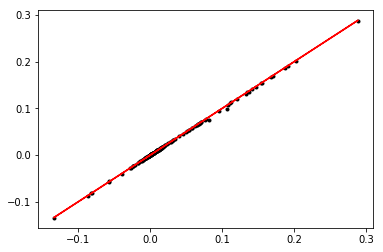

In [30]:
i = 5
print(np.linalg.norm(free_par_refit_list[i]))
plt.plot(free_par_refit_list[i] - best_param, free_par_refit_lr_list[i] - best_param, 'k.')
plt.plot(free_par_refit_list[i] - best_param, free_par_refit_list[i] - best_param, 'r')

In [32]:
def get_df_for_alpha(i):
    pass

In [86]:
import pandas as pd

dfs = []
for i in range(len(alpha_vec)):
    alpha = alpha_vec[i]

    free_par = free_par_refit_list[i]
    moment_model.set_moments_from_free_par(free_par)
    centroids = moment_model.moment_params['centroids'].get()
    for k in range(model.k_approx - 1):
        dfs.append(
            pd.DataFrame({ 'alpha': alpha_vec[i],
                           'k': k,
                           'centroids': centroids[:, k],
                           'dim': np.arange(0, centroids[:, k].shape[0]),
                           'method': 'true' }))

    free_par = free_par_refit_lr_list[i]
    moment_model.set_moments_from_free_par(free_par)
    centroids = moment_model.moment_params['centroids'].get()
    for k in range(model.k_approx - 1):
        dfs.append(
            pd.DataFrame({ 'alpha': alpha_vec[i],
                           'k': k,
                           'centroids': centroids[:, k],
                           'dim': np.arange(0, centroids[:, k].shape[0]),
                           'method': 'lr' }))


df_comb = pd.concat(dfs, axis=0)

# Look, this is getting more tedious than just doing it in R.

In [85]:
df_comb

,alpha,centroids,dim,k,method
0,1.0,0.400992,0,0,true
1,1.0,-0.210631,1,0,true
2,1.0,1.030234,2,0,true
3,1.0,0.361345,3,0,true
0,1.0,-0.837094,0,1,true
1,1.0,0.364137,1,1,true
2,1.0,-2.294455,2,1,true
3,1.0,-0.954592,3,1,true
0,1.0,-0.934602,0,2,true
1,1.0,-0.544799,1,2,true


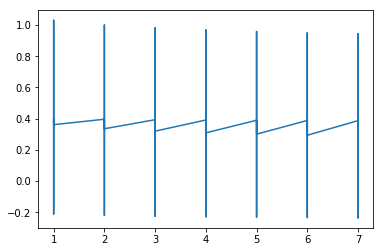

In [79]:
plt.plot(
    df_comb[(df_comb['method'] == 'true') & (df_comb['k'] == 0)]['alpha'],
    df_comb[(df_comb['method'] == 'true') & (df_comb['k'] == 0)]['centroids'])

In [75]:
df_plot.loc[(1.0, 0)]

method
lr      0.092989
true    0.395485
Name: (1.0, 0), dtype: float64

In [67]:
df_plot = pd.pivot_table(
    df_comb, values='centroids', index=['alpha', 'k'], columns=['method'])
print(df_plot)

method          lr      true
alpha k                     
1.0   0   0.092989  0.395485
      1  -0.930508 -0.930501
      2  -0.038389 -0.045594
      3   0.337312  0.334737
      4   1.281117  1.049384
      5   0.332113  0.852255
      6   0.328974  0.782293
      7   0.325848  0.738638
      8   0.322934  0.702691
      9   0.319886  0.665675
      10  0.316812  0.622343
2.0   0   0.356801  0.377655
      1  -0.927956 -0.930496
      2  -0.014723 -0.038404
      3   0.332025  0.370734
      4   0.613112  0.816511
      5   0.481204  0.676188
      6   0.464057  0.623019
      7   0.450972  0.588131
      8   0.438788  0.558719
      9   0.425305  0.528809
      10  0.408851  0.494914
3.0   0   0.348647  0.367226
      1  -0.931609 -0.930493
      2  -0.028465 -0.034198
      3   0.358803  0.391791
      4   0.499223  0.680290
      5   0.474684  0.573196
      6   0.450205  0.529850
      7   0.431544  0.500091
...            ...       ...
5.0   3   0.408646  0.418320
      4   0.47

In [64]:
print(df_plot['alpha'])
#plt.plot(df_plot['alpha'], df_plot['true'])

KeyError: 'alpha'